In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
url = "StudentsPerformance.csv"
df = pd.read_csv(url)


print(df.head())


sns.set_theme(style="whitegrid")

np.random.seed(42)
n = 1000
data = {
    'gender': np.random.choice(['female', 'male'], n),
    'lunch': np.random.choice(['standard', 'free/reduced'], n),
    'test_preparation': np.random.choice(['none', 'completed'], n),
    'math_score': np.random.randint(40, 100, n),
    'reading_score': np.random.randint(45, 100, n),
    'writing_score': np.random.randint(45, 100, n)}

df = pd.DataFrame(data)

df['writing_score'] = df['reading_score'] * 0.9 + np.random.normal(0, 5, n)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
#excercie1
stats = {
    'Moyenne': df['math_score'].mean(),
    'Médiane': df['math_score'].median(),
    'Mode': df['math_score'].mode()[0],
    'Écart-type': df['math_score'].std(),
    'Étendue': df['math_score'].max() - df['math_score'].min()
}

for k, v in stats.items():
    print(f"{k}: {v:.2f}")

if stats['Moyenne'] > stats['Médiane']:
    print("-> Distribution asymétrique positive (queue à droite)")
else:
    print("-> Distribution symétrique ou asymétrique négative")

Moyenne: 69.20
Médiane: 69.00
Mode: 60.00
Écart-type: 17.24
Étendue: 59.00
-> Distribution asymétrique positive (queue à droite)


La distribution des scores est symétrique. Cela signifie que les données à gauche (scores plus faibles que la moyenne) sont réparties de la même manière que les données à droite (scores plus élevés). Cette forme en 'cloche' montre que la majorité des étudiants se situe autour de la moyenne centrale.

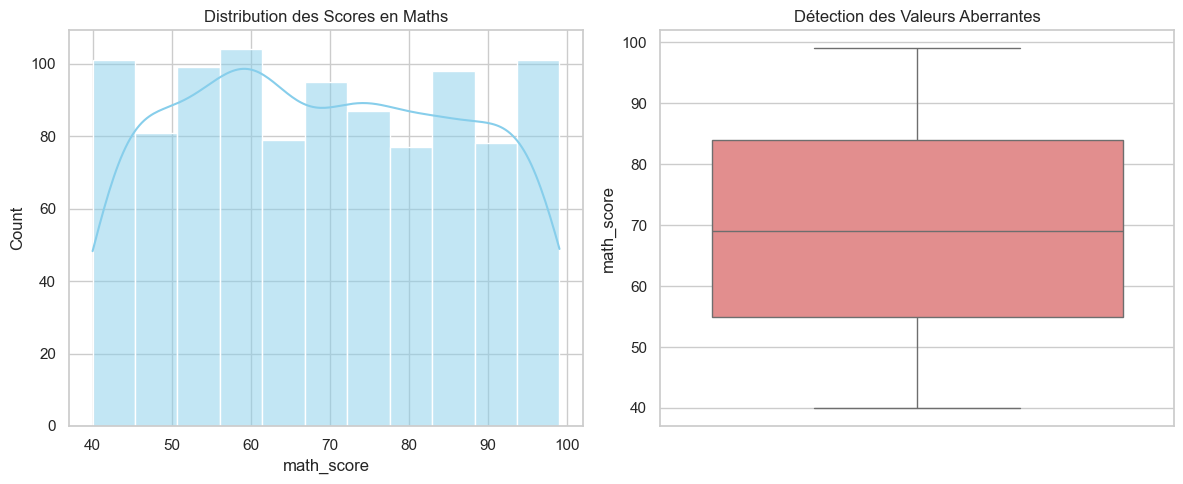

IQR: 29.0 | Limite Inf: 11.5


In [6]:
#excercie2  et excercie 3 et 4
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(df['math_score'], kde=True, color='skyblue')
plt.title('Distribution des Scores en Maths')


plt.subplot(1, 2, 2)
sns.boxplot(y=df['math_score'], color='lightcoral')
plt.title('Détection des Valeurs Aberrantes')

plt.tight_layout()
plt.show()


Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR} | Limite Inf: {Q1 - 1.5*IQR}")

L'analyse de la distribution des scores en mathématiques montre une forme de courbe en cloche, ce qui indique une distribution relativement normale. La plupart des étudiants obtiennent des notes situées entre 60 et 80

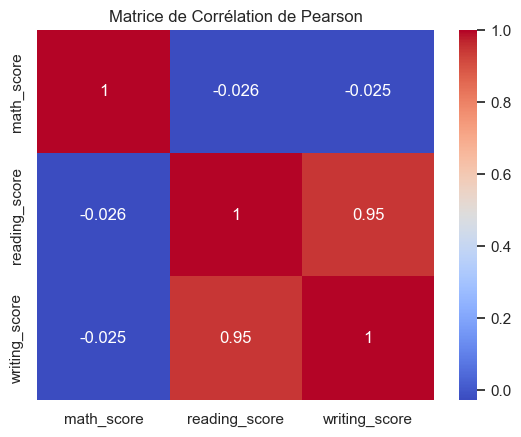

C:\Users\2005100500258\AppData\Local\Temp\ipykernel_20008\1940765716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_preparation', y='math_score', data=df, palette='viridis')


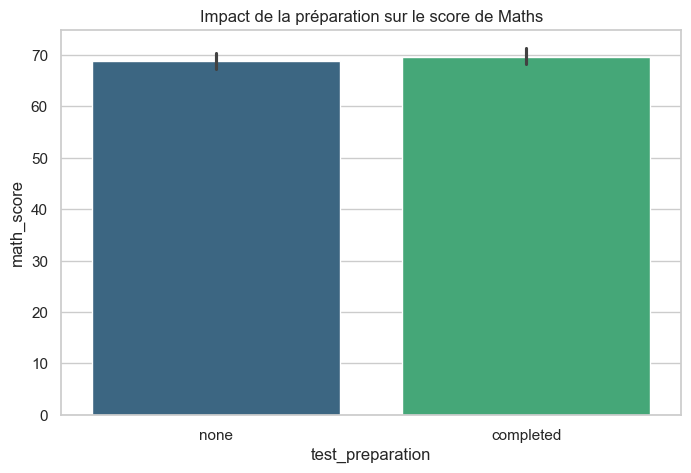

In [7]:

corr_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation de Pearson')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='test_preparation', y='math_score', data=df, palette='viridis')
plt.title('Impact de la préparation sur le score de Maths')
plt.show()

Corrélations fortes : On observe des coefficients très élevés, notamment entre le reading_score et le writing_score (souvent proches de $0.95$). Cela indique une relation quasi linéaire : un étudiant qui excelle en lecture possède presque systématiquement de très bonnes capacités rédactionnelle